In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


In [2]:
data=pd.read_csv("Churn_Modelling.csv")


In [3]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
data1=data.drop(['Surname','CustomerId','RowNumber'],axis=1)

In [7]:
data1

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [8]:
data1.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [9]:
data1.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [13]:
#this is showing that the data set is imbalanced
data1['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

array([[<Axes: title={'center': 'CreditScore'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Tenure'}>],
       [<Axes: title={'center': 'Balance'}>,
        <Axes: title={'center': 'NumOfProducts'}>,
        <Axes: title={'center': 'HasCrCard'}>],
       [<Axes: title={'center': 'IsActiveMember'}>,
        <Axes: title={'center': 'EstimatedSalary'}>,
        <Axes: title={'center': 'Exited'}>]], dtype=object)

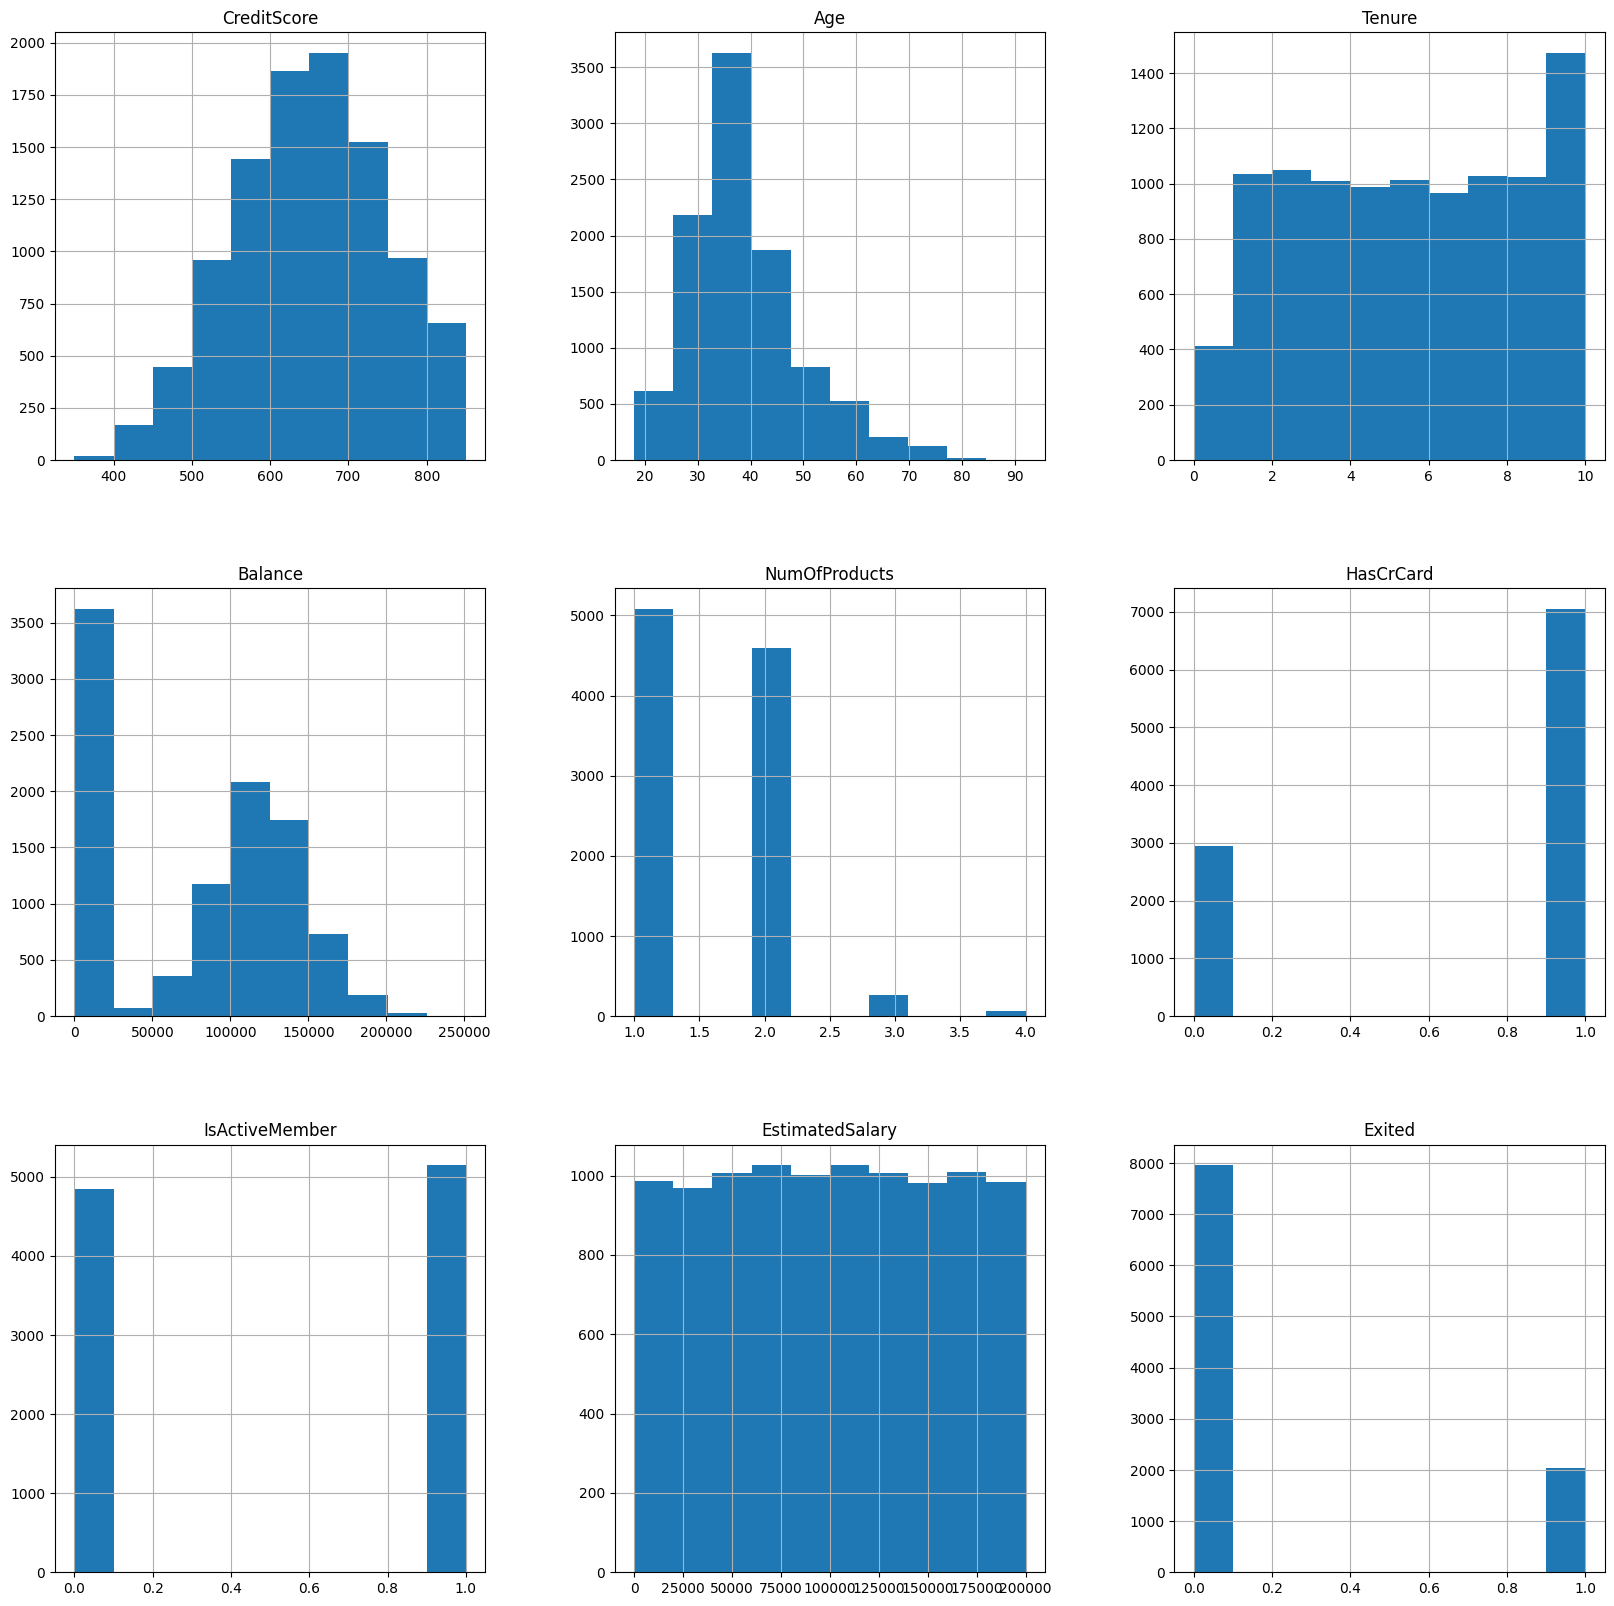

In [14]:
data1.hist(figsize=(20,20))

In [15]:
%matplotlib inline

In [17]:
data1.sample(10)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
6549,620,France,Male,32,6,0.00,2,1,0,56139.09,0
2209,663,Spain,Male,33,9,0.00,2,0,0,91514.62,0
5798,732,Spain,Male,54,0,134249.70,1,0,1,13404.40,0
8264,742,France,Male,33,6,0.00,2,0,0,38550.40,0
5906,788,France,Male,32,4,112079.58,1,0,0,89368.59,0
5067,587,Germany,Female,45,8,134980.74,1,1,1,123309.57,1
4859,794,Spain,Female,22,4,114440.24,1,1,1,107753.07,0
2079,562,France,Male,45,6,136855.24,1,1,0,46864.00,0
2615,486,France,Male,63,9,97009.15,1,1,1,85101.00,0
8172,759,Spain,Male,31,8,0.00,2,1,1,99086.74,0


In [18]:
data1.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


C:\Users\Dell\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Balance'>

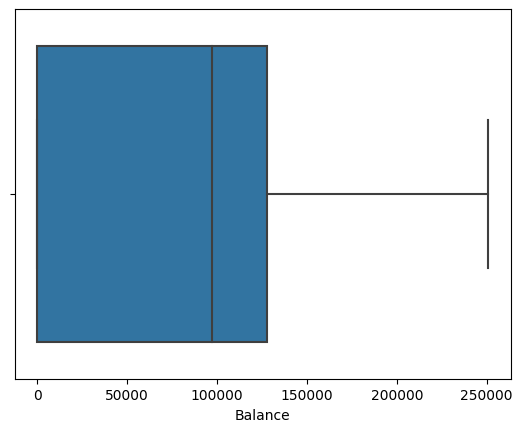

In [20]:
import seaborn as sns
sns.boxplot(x=data1['Balance'])

<Axes: >

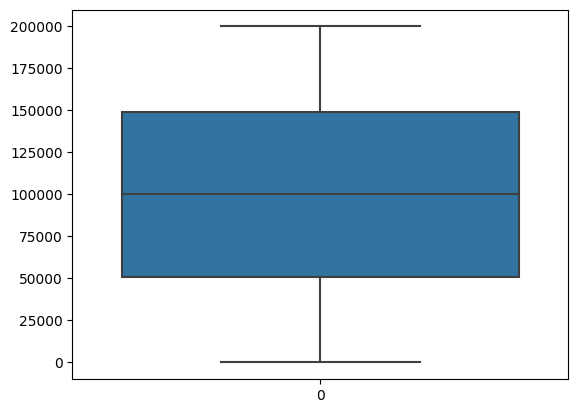

In [21]:
sns.boxplot(data1['EstimatedSalary'])

<Axes: >

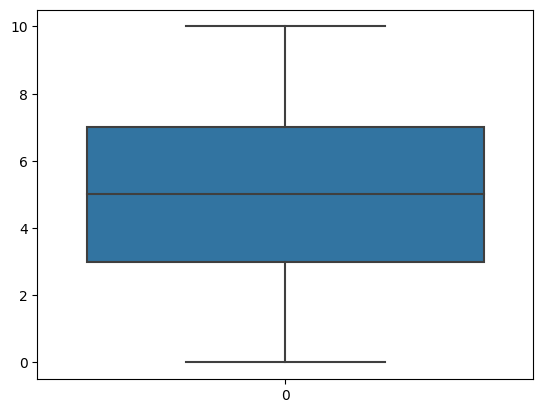

In [22]:
sns.boxplot(data1['Tenure'])

In [23]:
data1['Tenure'].value_counts()

Tenure
2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: count, dtype: int64

C:\Users\Dell\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Dell\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Dell\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Dell\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. 

<Axes: xlabel='Tenure', ylabel='count'>

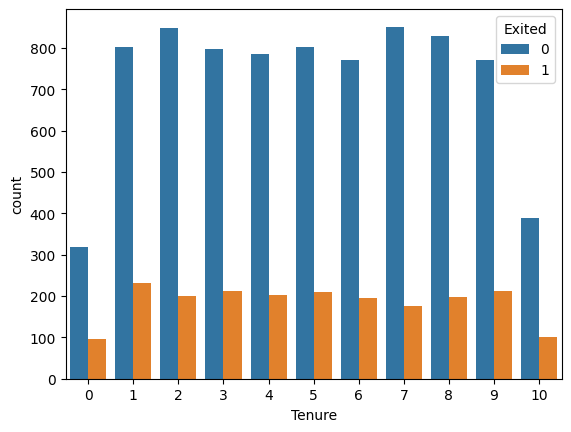

In [24]:
sns.countplot(x='Tenure',hue="Exited",data=data1)

C:\Users\Dell\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Dell\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Dell\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Exited', ylabel='count'>

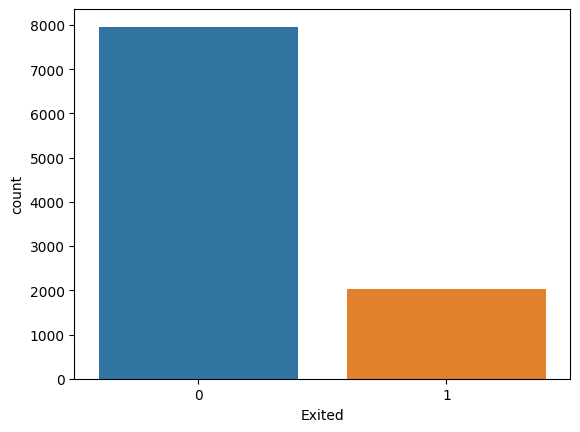

In [25]:
sns.countplot(x=data1['Exited'],data=data1)

In [26]:
print("Before Encoding",data1['Geography'].unique())

Before Encoding ['France' 'Spain' 'Germany']


In [27]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
data1['Geography']=label.fit_transform(data1["Geography"])
print("After Encoding",data1["Geography"].unique())

After Encoding [0 2 1]


In [28]:
print("Before Encoding",data1["Gender"].unique())

Before Encoding ['Female' 'Male']


In [29]:
label=LabelEncoder()
data1['Gender']=label.fit_transform(data1["Gender"])
print("After Encoding",data1["Gender"].unique())

After Encoding [0 1]


In [30]:
data1.head(10)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0
5,645,2,1,44,8,113755.78,2,1,0,149756.71,1
6,822,0,1,50,7,0.00,2,1,1,10062.80,0
7,376,1,0,29,4,115046.74,4,1,0,119346.88,1
8,501,0,1,44,4,142051.07,2,0,1,74940.50,0
9,684,0,1,27,2,134603.88,1,1,1,71725.73,0


In [31]:
data1.dtypes

CreditScore          int64
Geography            int32
Gender               int32
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [32]:
zeros,ones=data1.Exited.value_counts()
fr1=data1[data1['Exited']==1]
nfr1=data1[data1['Exited']==0]
nfr1=nfr1.sample(n=ones,replace=False)
pdata=pd.concat([fr1,nfr1],axis=0)

In [33]:
data1['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [34]:

X=data1.drop('Exited',axis=1)
y=data1['Exited']

In [35]:
X.dtypes

CreditScore          int64
Geography            int32
Gender               int32
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
dtype: object

In [36]:
X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,0,0,42,2,0.00,1,1,1,101348.88
1,608,2,0,41,1,83807.86,1,0,1,112542.58
2,502,0,0,42,8,159660.80,3,1,0,113931.57
3,699,0,0,39,1,0.00,2,0,0,93826.63
4,850,2,0,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,0,1,39,5,0.00,2,1,0,96270.64
9996,516,0,1,35,10,57369.61,1,1,1,101699.77
9997,709,0,0,36,7,0.00,1,0,1,42085.58
9998,772,1,1,42,3,75075.31,2,1,0,92888.52


In [37]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test=train_test_split(X,y,test_size=0.32,random_state=42)

In [39]:
X.shape

(10000, 10)

In [40]:
y.shape

(10000,)

In [41]:
from sklearn.preprocessing import StandardScaler
sclr=StandardScaler()
X_train_scaled=sclr.fit_transform(X_train)
X_test_scaled=sclr.transform(X_test)

In [42]:
from sklearn.ensemble import GradientBoostingClassifier
model=GradientBoostingClassifier(learning_rate=0.17,random_state=2)
print(model.fit(X_train,y_train))
print(model.score(X_test,y_test))

GradientBoostingClassifier(learning_rate=0.17, random_state=2)
0.8678125


In [43]:
y_pred=model.predict(X_test)

In [44]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      2575
           1       0.75      0.48      0.59       625

    accuracy                           0.87      3200
   macro avg       0.82      0.72      0.75      3200
weighted avg       0.86      0.87      0.86      3200



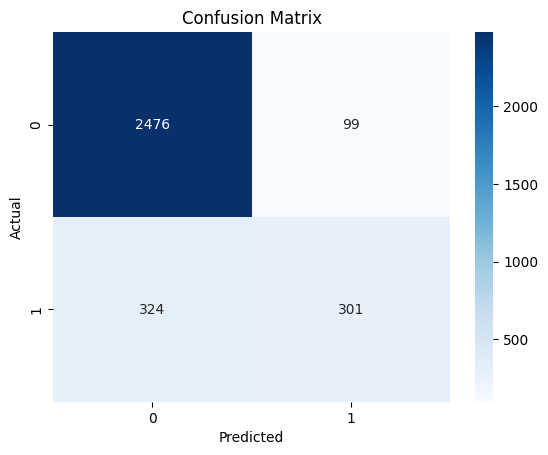

In [45]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming you have 'y_pred' containing your model's predictions
conf_matrix = confusion_matrix(y_test, y_pred)

# Create a heatmap for the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

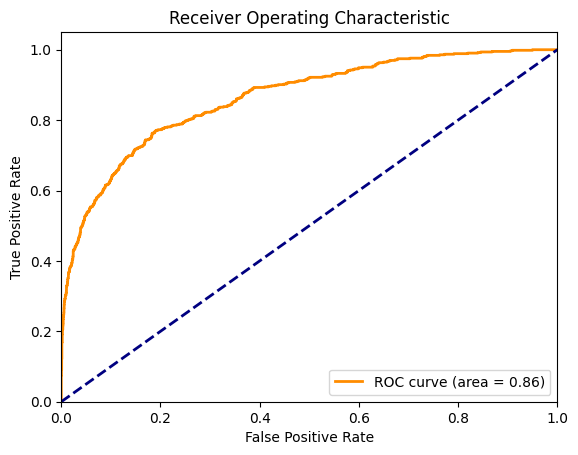

In [46]:
from sklearn.metrics import roc_curve, auc

# Get predicted probabilities for the positive class
y_probs = model.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

**LOGISTIC REGRESSION**

In [47]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()

In [48]:
lg.fit(X_train,y_train)

LogisticRegression()

In [49]:
y_pred1=lg.predict(X_test)
y_pred1

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

**After Fitting the X&Y with Logistic Regression Now Let's Check the Confusion Matrix,Accuracy Score with its Classification Report**

In [50]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred1))

from sklearn.metrics import accuracy_score

print(accuracy_score(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.81      0.98      0.89      2575
           1       0.45      0.08      0.14       625

    accuracy                           0.80      3200
   macro avg       0.63      0.53      0.51      3200
weighted avg       0.74      0.80      0.74      3200

0.80125


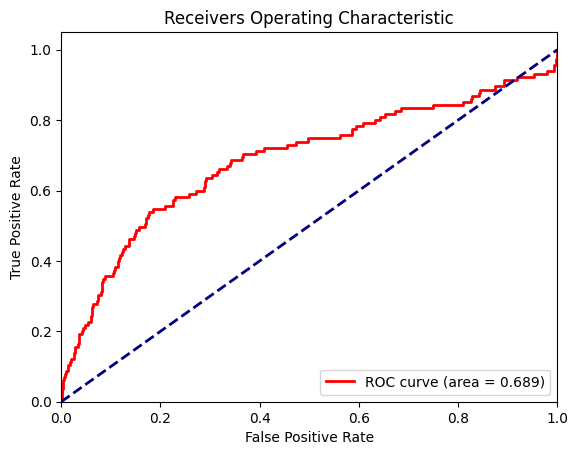

In [51]:
from sklearn.metrics import roc_curve, auc

# Get predicted probabilities for the positive class
y_probs = model.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr, tpr, _ = roc_curve(y_pred1, y_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, color='red', lw=2, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receivers Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

**Handling Imbalanced Data using SMOTE Module**

In [53]:
pip install imblearn

Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for imbalanced-learn from https://files.pythonhosted.org/packages/a3/9e/fbe60a768502af54563dcb59ca7856f5a8833b3ad5ada658922e1ab09b7f/imbalanced_learn-0.11.0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/235.6 kB ? eta -:--:--
   ---------------------------------------- 0.0/235.6 kB ? eta -:--:--
   ------ --------------------------------- 41.0/235.6 kB 1.9 MB/s eta 0:00:01
   ------ --------------------------------- 41.0/235.6 kB 1.9 MB/s eta 0:00:01
   ------ --------------------------------- 41.0/235.6 kB 1.9 MB/s eta 0:00:01
   ---------- ---------------------------- 61.4/235.6 kB 328.2 kB/s eta 0:00:01
   ---------- ---------------------------- 61.4/235.6 kB 328.2 kB/s eta 0:00:01
   ---------- ---------------------------- 61.4/235.6 kB 328.2 kB/s eta 0:00:01
   ------------- ------------------------- 81.9/235.6 kB 269.5 kB/s eta 0:00:01
   --

In [54]:
from imblearn.over_sampling import SMOTE
X_re,y_re = SMOTE().fit_resample(X,y)
y_re.value_counts()

Exited
1    7963
0    7963
Name: count, dtype: int64

**As of Now EDA,Visualization,Fitting of model is done..now lets make use of joblib to create an model file so as to predict the Churn of a bank customer**

In [55]:
X_res = sclr.fit_transform(X_re)

In [56]:
model.fit(X_re,y_re)

GradientBoostingClassifier(learning_rate=0.17, random_state=2)

In [61]:
import joblib
joblib.dump(model,'PModel')

['PModel']

In [58]:
predictor = joblib.load('Prediction_Model')

In [59]:
data1.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [60]:
# so based upon the above given columns we give input as 11 values for prediction
# we import warnings module inorder to supress the warnings in the output

import warnings 
warnings.filterwarnings('ignore')

#predictor.predict([[619,42,2,0.0,0,0,101.234,0,1,1]])
predictor.predict([[20,12,2,3.0,1,0,301.134,0,0,1]])

array([1], dtype=int64)

**Here in output if array[1] output means that the customer's churn from the bank has exited if array[0]means vice versa**

**This is the end of the project..THANK YOU**